### Globals

In [27]:
library(magrittr)  # nice piping operators
library(tidyverse)  # tables, plotting, read-write
library(Cairo)  # for pdf unicode export
library(stringr)
library(dplyr)
library(rasilabRtemplates)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#000000", "#E69F00", "#56B4E9", 
            "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

### Figure 1C

In [28]:
data <- read_tsv('../data/plate_reader/1c_data.tsv')
annotations <- read_csv('../data/plate_reader/1c_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>%
  mutate(od = od - 0.04) %>%
  mutate(genotype = factor(genotype, levels=c('WT','sdaA','sdaCB','tdcG')))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  medium = col_character(),
  serine_mM = col_double(),
  replicate = col_integer(),
  plate = col_integer()
)


Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

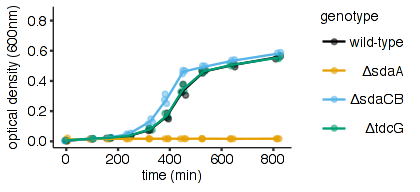

In [29]:
# plot
plot.width = 3.5
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(processed_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 10, h = 0)) +
scale_y_continuous(limits=c(0,0.85)) +
scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaA")), 
                            expression(italic("ΔsdaCB")),
                            expression(italic("ΔtdcG")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

# save plot
ggsave('../pdf/fig_1c.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Figure 1D-E

In [30]:
data <- read_tsv('../data/plate_reader/1de_data.tsv')
annotations <- read_csv('../data/plate_reader/1de_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>%
  mutate(od = od - 0.04) %>%
  mutate(genotype = factor(genotype, levels=c('WT','sdaA','sdaCB','tdcG')))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  genotype_serA = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

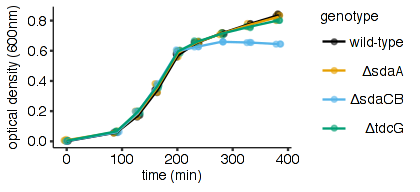

In [31]:
# subset data for Fig 1D
subset <- filter(processed_data, genotype_serA == 'WT')

# plot
plot.width = 3.5
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(subset, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) +
scale_y_continuous(limits=c(0,0.85)) +
scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaA")), 
                            expression(italic("ΔsdaCB")),
                            expression(italic("ΔtdcG")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

# save plot
ggsave('../pdf/fig_1d.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

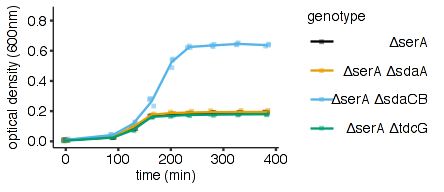

In [32]:
# subset data for Fig 1E
subset <- filter(processed_data, genotype_serA == 'serA')

# plot
plot.width = 3.7
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(subset, aes(x=time, y=od, col=genotype)) +
geom_point(shape=15, size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) +
scale_y_continuous(limits=c(0,0.85)) +
scale_color_manual(values=cbPalette, 
                   labels=c(expression(italic("ΔserA")), 
                            expression(italic("ΔserA ΔsdaA")),
                            expression(italic("ΔserA ΔsdaCB")),
                            expression(italic("ΔserA ΔtdcG")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

# save plot
ggsave('../pdf/fig_1e.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Figure 1 Supplement

In [33]:
data <- read_tsv('../data/plate_reader/supp_data_1.tsv')
annotations <- read_csv('../data/plate_reader/supp_ann_1.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04)

plot_data <- processed_data %>% 
  # control order of variables
  mutate(medium = factor(medium,
                           levels=c("rich_glucose", "rich_glycerol"),
                           labels=c("rich, 0.5% glucose", "rich, 0.5% glycerol"))) %>%
  mutate(genotype = factor(genotype, levels=c("WT","sdaA","sdaCB"))) %>%
  subset(genotype_serA == 'WT')

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  genotype_serA = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


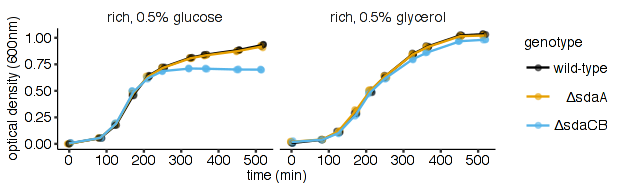

In [35]:
# plot 
plot.width = 5.2
plot.height = 1.6
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(plot_data, aes(x=time, y=od, col=factor(genotype))) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + facet_wrap(~medium) +
scale_colour_manual(values=cbPalette, labels=c("wild-type", 
                                               expression(italic("ΔsdaA")), 
                                               expression(italic("ΔsdaCB")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

# save plot
ggsave('../pdf/supp_1a.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)